# Introduction To Scikit-Learn(sklearn)


This notebook demonstrates some of the most userful functions of the Scikit-Learn library.

In [1]:
# Standard import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

 # An end-to-end Scikit-Learn workflow

In [2]:
# Get the data reday

heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Different name for:
    * x = features , features variables, data
    * y = labels, targets, target variables

In [3]:
# create x (features matrix)
x = heart_disease.drop('target', axis = 1)

# create y (labels)
y = heart_disease['target']

In [4]:
#choose the right model and hyperparameters

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier() # n_estimators = 10 to 100, 10 is default

#keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
import warnings
warnings.filterwarnings("default") # "ignore" can be used for ingore all warnings

In [6]:
# fit the model to training data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [7]:
clf.fit(x_train, y_train);

/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [8]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3
113,43,1,0,110,211,0,1,161,0,0.0,2,0,3


In [9]:
y_test

96     1
69     1
42     1
13     1
180    0
      ..
97     1
7      1
70     1
113    1
206    0
Name: target, Length: 76, dtype: int64

In [10]:
y_preds = clf.predict(x_test)
y_preds

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [11]:
# Evaluate the model

clf.score(x_train, y_train)

0.986784140969163

In [12]:
clf.score(x_test, y_test)

0.7368421052631579

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.69      0.81      0.74        36
           1       0.79      0.68      0.73        40

    accuracy                           0.74        76
   macro avg       0.74      0.74      0.74        76
weighted avg       0.75      0.74      0.74        76



In [14]:
confusion_matrix(y_test, y_preds)

array([[29,  7],
       [13, 27]])

In [15]:
confusion_matrix(y_test, y_preds)

array([[29,  7],
       [13, 27]])

In [16]:
accuracy_score(y_test, y_preds)

0.7368421052631579

In [17]:
#improve a model
#try different amount of n_estimators

np.random.seed(0)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators..")
    clf = RandomForestClassifier(n_estimators = i).fit(x_train, y_train)
    print(f"Model Accuracy on test set: {clf.score(x_test, y_test) * 100:.2f}%")
    print("")


Trying model with 10 estimators..
Model Accuracy on test set: 76.32%

Trying model with 20 estimators..
Model Accuracy on test set: 80.26%

Trying model with 30 estimators..
Model Accuracy on test set: 80.26%

Trying model with 40 estimators..
Model Accuracy on test set: 80.26%

Trying model with 50 estimators..
Model Accuracy on test set: 76.32%

Trying model with 60 estimators..
Model Accuracy on test set: 80.26%

Trying model with 70 estimators..
Model Accuracy on test set: 78.95%

Trying model with 80 estimators..
Model Accuracy on test set: 80.26%

Trying model with 90 estimators..
Model Accuracy on test set: 78.95%



In [18]:
# save model and load it 
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl","wb"))

/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: ResourceWarning: unclosed file <_io.BufferedWriter name='random_forest_model_1.pkl'>
  after removing the cwd from sys.path.


In [19]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(x_test, y_test)

/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ResourceWarning: unclosed file <_io.BufferedReader name='random_forest_model_1.pkl'>
  """Entry point for launching an IPython kernel.


0.7894736842105263

In [20]:
loaded_model.score(x_train, y_train)

1.0

In [21]:
import sklearn
sklearn.show_versions()


System:
    python: 3.7.4 (default, Aug 13 2019, 20:35:49)  [GCC 7.3.0]
executable: /home/a2r7i4f3/anaconda3/bin/python
   machine: Linux-5.3.0-45-generic-x86_64-with-debian-buster-sid

Python deps:
       pip: 19.2.3
setuptools: 41.4.0
   sklearn: 0.21.3
     numpy: 1.17.2
     scipy: 1.3.1
    Cython: 0.29.13
    pandas: 0.25.1


In [22]:
print("")

###  1. Getting our data ready to be used with machine learning
 
    Three Main things to do:
        1. Split the data into features and labels (usally `x` and `y`)
        2. Filling (also called inputing) or disregarding missing values
        3. converting no-numerical values to numerical values (also called feature encoding)
 

In [23]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
x = heart_disease.drop('target', axis = 1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [25]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25) # 25% data for testing, 75% data for training


In [27]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

In [28]:
x.shape

(303, 13)

In [29]:
x.shape[0] * .75

227.25

In [30]:
227+76

303

In [31]:
len(heart_disease)

303

### 1.1 Make sure it's all numerical

In [32]:
car_sales = pd.read_csv('data/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [33]:
len(car_sales), type(car_sales)

(1000, pandas.core.frame.DataFrame)

In [34]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [35]:
# split into x/y
x = car_sales.drop('Price', axis = 1)
y = car_sales['Price']

# split into training and test
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.25)

In [36]:
x_train.shape, x.shape[0] * .75

((750, 4), 750.0)

In [37]:
car_sales['Doors'].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [38]:
car_sales['Odometer (KM)'].value_counts()

73869     2
129188    2
244404    1
10954     1
10953     1
         ..
40285     1
131587    1
95579     1
38233     1
184320    1
Name: Odometer (KM), Length: 998, dtype: int64

In [39]:
# build machine learning model

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: could not convert string to float: 'Nissan'

In [40]:
# turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder = 'passthrough')

transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [41]:
pd.DataFrame(transformed_x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [42]:
dummies = pd.get_dummies(car_sales[['Make', 'Colour', 'Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [43]:
# refit the modle
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                    y,
                                                    test_size = 0.2)
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [44]:
model.score(x_test, y_test)

0.30431565439836705

## What if there were misising values?

    1. Fill them with some value (also known as imputation)
    2. Remove the samples with missing data altogether.

In [45]:
# import car sales missing data

car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [46]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [47]:
# Create x and y

x = car_sales_missing.drop('Price', axis = 1)
y = car_sales_missing['Price']

In [48]:
# Convert data to numbers
# Turn the caategories into number

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one hot', one_hot, categorical_features)],
                                remainder = 'passthrough')

transformed_x = transformer.fit_transform(x)
transformed_x

ValueError: Input contains NaN

In [49]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


## Option 1: Fill missing data with pandas

In [50]:
# Fill the 'Make' column

car_sales_missing['Make'].fillna('missing', inplace = True)

# Fill the "Colour" Column

car_sales_missing['Colour'].fillna('missing', inplace = True)

# Fill the 'Odomoter (KM)' column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace = True)

# Fill the 'Doors' column
car_sales_missing['Doors'].fillna(4, inplace = True)

In [51]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [52]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace = True)
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [53]:
len(car_sales_missing)

950

In [54]:
x = car_sales_missing.drop('Price', axis = 1)
y = car_sales_missing['Price']

In [55]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categorical_features)],
                                  remainder = 'passthrough')

transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

## Opting 2: Fill missing values with Scikit-Learn

In [56]:
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [57]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [58]:
car_sales_missing.dropna(subset = ['Price'], inplace = True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [59]:
x = car_sales_missing.drop('Price', axis = 1)
y = car_sales_missing['Price']

In [60]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values wih 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define columns
cat_features = ['Make', 'Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']

# Create an imputer (something that fills missing data) 

imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_features),
    ('num_imputer', num_imputer, num_features)
])

filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [61]:
car_sales_filled = pd.DataFrame(filled_x,
                                columns= ['Make', 'Colour', 'Doors', 'Odometer (KM)'])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [62]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [63]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Odometer (KM)']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categorical_features)],
                               remainder='passthrough')
transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x913 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [64]:
# Now we've got our data as numbers and filled (no missing values)
# Let's fit a model
np.random.seed(0)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                    y,
                                                    test_size = 0.2)
model = RandomForestRegressor(n_estimators = 100)
model.fit(x_train, y_train)
model.score(x_test, y_test)

-0.10385991629996161

In [65]:
len(car_sales_filled), len(car_sales)

(950, 1000)

## Choosing the right estimator / algorithm
Scikit-Learn uses estimator as another term for machine learning model for algorithm.

    * Classification - predicting whether a sample is one thing or another
    * Regression - predicting a number
    
    Scikit_Learn machine learnging map...https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## Picking a machine learning model for a regression problem

In [66]:
# Import Boston housing dataset 
from sklearn.datasets import load_boston
boston = load_boston()
boston;

/home/a2r7i4f3/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [67]:
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [68]:
len(boston_df)

506

In [69]:
# Ridge regression model 
from sklearn.linear_model import Ridge

# Set up random seed
np.random.seed(42)

# Split into train and test sets
x = boston_df.drop('target', axis = 1)
y = boston_df['target']

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(x_train, y_train)

# Check the score of the Ridge model on test data
model.score(x_test, y_test)

0.6662221670168522

In [70]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [71]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

# setup random seed
np.random.seed(42)

#split the data
x = boston_df.drop('target', axis = 1)
y = boston_df['target']

# instantiate RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.8896648705127477

In [72]:
#Check the Ridge model again
model.score(x_test, y_test)

0.6662221670168522

## Choosing an estimator for a classification problem
map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [73]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [74]:
len(heart_disease)

303

Consulting the map it says to try LinearSVC

In [75]:
# Import the LinearSVC estimator class
# Linear Support Vector Classificatio

from sklearn.svm import LinearSVC

# Setup reandom seed
np.random.seed(42)

# Make the data ready
x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2)

# Instantiate LinearSVC

clf = LinearSVC()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)



/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8688524590163934

    1. If you have structured data, use ensemble methods
    2. If you have unstructured data , use deep learning or transfer learning

In [76]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [77]:
from sklearn.linear_model import Ridge

# Setup reandom seed
np.random.seed(42)

# Make the data ready
x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2)

# Instantiate Ridge

clf = Ridge()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.5351464847153696

## Fit the model/algorithm on our data and use it to make predictions

## Fitting the model to the data

In [78]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [79]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [80]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

## Make predictions using machine learning model

2 ways to make prediction:
1. `predict()`
2. `predict_proba()`

In [81]:
clf.predict(x_test)

array([ 2.07944123e-01,  6.32780475e-01,  7.17020716e-01,  4.62746967e-02,
        9.33542387e-01,  8.28069879e-01,  5.54142159e-01, -3.11527712e-01,
       -1.25005849e-01,  5.05724299e-01,  6.73182713e-01,  2.29665165e-01,
        8.36206112e-01,  1.03146361e-01,  1.10357710e+00,  9.04975940e-01,
        1.08493583e+00,  2.12542895e-01, -1.38880204e-01, -2.81078949e-02,
        6.09782309e-01, -5.42847631e-02,  3.54247837e-01,  6.82380639e-01,
        8.85340933e-01,  6.07907644e-01,  8.19454678e-01,  5.35691469e-01,
       -9.96822781e-02,  8.93797304e-01,  6.25728850e-02,  7.51767395e-02,
       -1.45774816e-01,  2.43427135e-01,  6.89841208e-01,  1.98356510e-01,
        6.66585905e-01,  7.77919959e-01,  6.85516969e-01,  7.55537359e-01,
        4.94601851e-01,  6.43380361e-01,  7.55216583e-01,  6.73500579e-01,
        7.46334390e-01, -1.86674714e-01,  6.64022995e-01,  9.16284227e-01,
        2.25478808e-01, -3.11608187e-04,  1.57922692e-01, -1.25168370e-01,
        7.81927741e-01,  

In [82]:
y_test # y_true

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [83]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test) 

0.0

In [84]:
clf.score(x_test, y_test)

0.5351464847153696

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

Make prediction with `predict_proba()`


In [86]:
# predict_proba() returns probabilities of a classification label 
clf.predict_proba(x_test[:5])

AttributeError: 'Ridge' object has no attribute 'predict_proba'

In [87]:
clf.predict(x_test[:5])

array([0.20794412, 0.63278048, 0.71702072, 0.0462747 , 0.93354239])

In [88]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

`predict()` can also be used for regression models

In [89]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [90]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#create data
x = boston_df.drop('target', axis=1)
y = boston_df['target']

#split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#instantiate and fit model
model = RandomForestRegressor(n_estimators=100).fit(x_train, y_train)
model.score(x_test, y_test)

0.873969014117403

In [91]:
#make prediction 
y_preds = model.predict(x_test)
y_preds

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738, 19.516, 19.83 ,  8.885, 21.918, 19.477, 26.465,
       19.347,  8.039, 45.414, 14.542, 24.564, 23.941, 14.481, 23.077,
       15.031, 14.625, 21.171, 14.164, 19.251, 20.717, 19.433, 23.242,
       31.091, 20.39 , 14.294, 15.796, 34.3  , 19.155, 20.639, 24.464,
       18.779, 29.688, 45.257, 19.449, 22.334, 13.727, 15.408, 24.621,
       18.783, 28.247, 21.411, 33.961, 17.011, 26.312, 44.904, 21.988,
       15.65 , 32.316, 22.281, 20.394, 25.405, 34.266, 28.938, 18.857,
       26.909, 17.154, 13.731, 23.079, 28.508, 15.818, 20.41 , 28.38 ,
       10.153, 21.336, 22.393,  7.093, 20.059, 45.424, 10.964, 12.914,
       21.387, 12.29 , 20.234,  9.065, 20.218, 26.736, 15.531, 23.228,
       23.568, 17.719, 21.64 ,  7.991, 19.6  , 18.7  , 22.292, 19.665,
       38.756, 13.03 , 12.49 , 13.406, 20.219, 23.898])

In [92]:
np.array(y_test.head())

array([23.6, 32.4, 13.6, 22.8, 16.1])

In [93]:
# compare the prediction to the truth

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.1226372549019623

## Evaluating a machine learning model
Three ways to evaluate Scikit-Learn model/estimators
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric functions

## Evaluationg a model with the score method

In [94]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

#split into train and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# instantiate and fit model
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [95]:
clf.score(x_train, y_train)

1.0

In [96]:
clf.score(x_test, y_test)

0.8524590163934426

In [97]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#create the data
x = boston_df.drop('target', axis=1)
y = boston_df['target']

#split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)
model = RandomForestRegressor(n_estimators=100).fit(x_train, y_train)

In [98]:
model.score(x_test, y_test)

0.873969014117403

## Evaluating a model using the `scoring` parameter

In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

#create the data
x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

#split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)
#instantiate model 
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train);

In [100]:
clf.score(x_test, y_test)

0.7704918032786885

In [101]:
cross_val_score(clf, x, y, cv=5) #cv = cross_validation

array([0.80327869, 0.90163934, 0.81967213, 0.85      , 0.8       ])

In [102]:
cross_val_score(clf, x, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.90322581, 0.87096774,
       0.76666667, 0.73333333, 0.86666667, 0.72413793, 0.82758621])

In [103]:
np.random.seed(42)

#single training and test split score
clf_single_score = clf.score(x_test, y_test)

#take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, x, y, cv=5))

#compare the two
clf_single_score, clf_cross_val_score

(0.7704918032786885, 0.8248087431693989)

In [104]:
# Default scoring parameter of classifier = mean accuracy
clf.score(x_test, y_test)

0.7704918032786885

In [105]:
#Scoring parameter set to None by default
cross_val_score(clf, x, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])


## Classification model evaluation metrics

documentation.... https://scikit-learn.org/stable/modules/model_evaluation.html

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. classification report

**Accuracy**

In [106]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, x, y, cv=5)

In [108]:
np.mean(cross_val_score)

0.8248087431693989

In [109]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* Receiver Operating Charactersitic Curve (ROC)

ROC curves are a comparison of a model's ture positive rate (tpr) versus a models false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [110]:
from sklearn.metrics import roc_curve

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

#fit the classifier

clf.fit(x_train, y_train)

# Make prediction with probabilities
y_probs = clf.predict_proba(x_test)
y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [111]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [112]:
#calculate fpr, tpr and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

#check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

In [113]:
thresholds

array([2.  , 1.  , 0.98, 0.95, 0.92, 0.88, 0.87, 0.86, 0.85, 0.83, 0.81,
       0.8 , 0.77, 0.76, 0.71, 0.66, 0.6 , 0.57, 0.49, 0.4 , 0.38, 0.31,
       0.28, 0.23, 0.2 , 0.  ])

In [114]:
tpr

array([0.     , 0.     , 0.125  , 0.1875 , 0.25   , 0.3125 , 0.375  ,
       0.375  , 0.5    , 0.53125, 0.5625 , 0.59375, 0.59375, 0.625  ,
       0.71875, 0.71875, 0.78125, 0.8125 , 0.90625, 0.90625, 0.9375 ,
       0.9375 , 0.96875, 0.96875, 1.     , 1.     ])

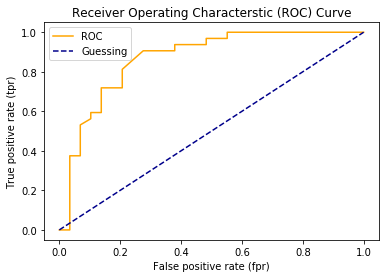

In [115]:
# Create a function for plotting ROC curves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], color='darkblue', linestyle='--',label = 'Guessing')
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characterstic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [116]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

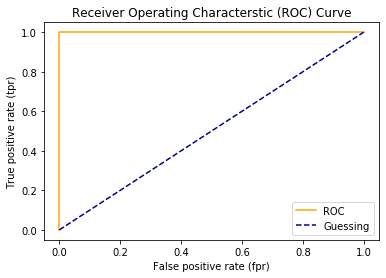

In [117]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [118]:
#perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**


A confusion matrix is a quick way to compares the labels of a model predicts and the actual  labels it was supposed to predict.

In essence, giving you an idea where the model is getting confused.



In [119]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [120]:
# Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test,
            y_preds,
            rownames=['Actual Lable'],
            colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Lable,,
0,23,6
1,6,26


In [121]:
len(x_test)

61

In [122]:
20+7+5+29

61

/home/a2r7i4f3/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


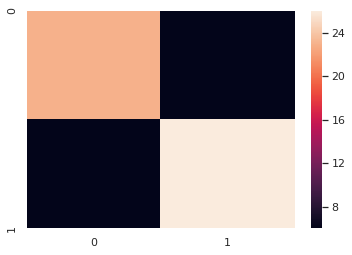

In [123]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

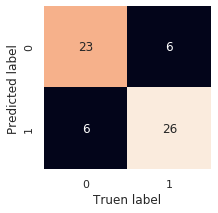

In [124]:
def plot_conf_mat(conf_mat):
    """
    plots a confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                     annot= True, #Annotate the boxes with conf_mat info
                     cbar=False)
    
    plt.xlabel('Truen label')
    plt.ylabel('Predicted label')
    
    # Fix the broken annotation (this happened in Matplotlib 3.1.1)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom+0.5, top-0.5)
    
plot_conf_mat(conf_mat);

In [125]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, x, y)

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

In [126]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [127]:
# Where precision and recall become valuable
disease_true = np.zeros(1000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(1000) #model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.9990,0.0,0.999,0.49950,0.998001
recall,1.0000,0.0,0.999,0.50000,0.999000
f1-score,0.9995,0.0,0.999,0.49975,0.998500
support,999.0000,1.0,0.999,1000.00000,1000.000000


**To Summarize classification matrics:**
* Accuracy is good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1.

* Precesion and Recall become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision
* If false negative are worse than false positives, aim for higher recall.
* F1-score is a combination of precision and recall.

### Regression model evaluation metrics
documentation... https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (Pronounced r-squared) or coefficient of determination.
2. Mean absolute error (MAE)
3. Mean Squared error (MSE)

**R^2**

What R-Squared does: Compares models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. 
For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predict a range of number , it's R^2 value would be 1.

In [128]:
from  sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop('target', axis=1)
y = boston_df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.873969014117403

In [129]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())


In [130]:
r2_score(y_test, y_test_mean) # need to find out why value is not just 0. 

2.220446049250313e-16

In [131]:
r2_score(y_test, y_test)

1.0

**Mean absolute error (MAE)**

MAE is the average of the absolute difference between predictions and actual values. It gives you an idea of how wrong your model predictions are.

In [132]:
#Mean absolute error

from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.1226372549019623

In [133]:
df = pd.DataFrame(data = {"Actual Values": y_test,
                  "Predicted Values": y_preds})
df['Differences']  = df['Predicted Values'] - df['Actual Values']
df

,Actual Values,Predicted Values,Differences
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753
...,...,...,...
412,17.9,13.030,-4.870
436,9.6,12.490,2.890
411,17.2,13.406,-3.794
86,22.5,20.219,-2.281


**Mean Squared Error (MSE)**

In [134]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse

9.242328990196082

## Improving a model

First prediction = baseline prediction

First model = baseline model

From data perspective:
* Could we collect more data? (more data , the better)
* could we improve our data?

From the model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs. Parameters

* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patters

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [135]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.get_params();

## Tuning hyperparameters by hand

Make 3 sets, training, validation and test.

In [136]:
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Try and adjust:
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples-split`
* `n_estimators`


In [137]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict


In [138]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into x and y
x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, test, validation sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% data
x_train, y_train = x[:train_split], y[:train_split] #upto train_split
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split] # from train_split to valid split
x_test, y_test = x[valid_split:], y[valid_split] #valid split onwards

len(x_train), len(x_valid), len(x_test)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Make baseline prediction
y_preds = clf.predict(x_valid)

# Evaluate the classifier on validation sets
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 80.00%
Precision: 0.77
Recall: 0.92
F1 score: 0.84


/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'accuracy': 0.8, 'precision': 0.77, 'recall': 0.92, 'f1': 0.84}

In [139]:
np.random.seed(42)

#Create a second classifier with different hypterparameters

clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(x_train, y_train)

#Make Predicitions with different hyperparameters
y_preds_2 = clf_2.predict(x_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


In [140]:
clf_3 = RandomForestClassifier(n_estimators=100,
                               max_depth=10)
clf_3.fit(x_train, y_train)

y_preds_3 = clf_3.predict(x_valid)
clf_3_metrics = evaluate_preds(y_valid, y_preds_3)

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


## Hyperparameter tuning with RandomizedSearchCV

In [141]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into x & y
x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Instantiate RandomForestClssifier

clf = RandomForestClassifier(n_jobs=1)

#Setup RandomizedsearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, # number of model to try
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(x_train, y_train);


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.7s
[CV] n_estimators=1000, min_samples_split=4, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   24.4s finished
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [143]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [144]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(x_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


## Hyperparameter tuning with GridSearchCV

In [145]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [146]:
grid_2 = {"n_estimators": [10, 100, 200, 500],
          "max_depth": [None],
          "max_features": ["auto", "sqrt"],
          "min_samples_split": [6],
          "min_samples_leaf": [1, 2]}

In [147]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into x & y
x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Instantiate RandomForestClssifier

clf = RandomForestClassifier(n_jobs=1)

#Setup RandomizedsearchCV
gs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid,
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimator

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   1.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.9s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   1.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1000, total=   1.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   1.6s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   1.6s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   1.6s
[CV] max_depth=None, max_

[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, total=   1.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000, total=   1.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   1.8s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   1.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   1.6s
[CV] max_depth=None, max_

[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000, total=   1.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000, total=   1.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   1.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   1.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   1.5s
[CV] max_depth=None, max_

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   1.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   1.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, total=   1.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, total=   1.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, total=   1.5s
[CV] max_depth=None, max_

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=

[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   1.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   1.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   1.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   1.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   1.5s
[CV] max_depth=5, max_features=auto, min_samples_lea

[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   0.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   0.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   0.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   0.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   0.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200, total=   1.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200, total=   1.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200, total=   1.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200, total=   1.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200, total=   1.5s
[CV] max_depth=5, max_features=auto, min_samples_lea

[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200, total=   1.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200, total=   1.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200, total=   1.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200, total=   1.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200, total=   1.5s
[CV] max_depth=5, max_features=sqrt, min_samples_lea

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   1.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   1.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   1.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   1.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   1.5s
[CV] max_depth=5, max_features=sqrt, min_samples_lea

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200, total=   1.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200, total=   1.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200, total=   1.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200, total=   1.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200, total=   1.5s
[CV] max_depth=5, max_features=sqrt, min_samples_lea

[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   1.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   1.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   1.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   1.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   1.5s
[CV] max_depth=10, max_features=auto, min_s

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   1.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   1.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   1.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   1.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   1.5s
[CV] max_depth=10, max_features=auto, min_s

[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   0.6s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   0.6s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   0.6s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   0.6s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   0.6s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   1.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   1.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   1.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   1.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   1.5s
[CV] max_depth=10, max_features=sqrt, min_s

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, total=   1.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, total=   1.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, total=   1.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, total=   1.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, total=   1.5s
[CV] max_depth=10, max_features=sqrt, min_s

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   1.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   1.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   1.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   1.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, total=   1.5s
[CV] max_depth=20, max_features=auto, min_s

[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   0.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   0.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   0.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   0.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   0.6s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200, total=   1.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200, total=   1.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200, total=   1.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200, total=   1.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200, total=   1.5s
[CV] max_depth=20, max_features=auto, min_s

[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200, total=   1.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200, total=   1.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200, total=   1.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200, total=   1.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1200, total=   1.5s
[CV] max_depth=20, max_features=sqrt, min_s

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_le

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=20, max_features=sqrt, min_samples_le

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   1.5s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   1.5s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   1.5s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   1.5s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   1.5s
[CV] max_depth=20, max_features=sqrt, min_s

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_le

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   0.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   0.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   0.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   0.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   0.6s
[CV] max_depth=20, max_features=sqrt, min_samples_le

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200, total=   1.5s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200, total=   1.5s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200, total=   1.5s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200, total=   1.6s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200, total=   1.5s
[CV] max_depth=20, max_features=sqrt, min_s

[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=30, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   1.5s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   1.5s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   1.5s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   1.5s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   1.5s
[CV] max_depth=30, max_features=auto, min_s

[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=30, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   1.5s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   1.5s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   1.5s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   1.5s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, total=   1.5s
[CV] max_depth=30, max_features=auto, min_s

[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   0.6s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   0.6s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   0.6s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   0.6s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   0.6s
[CV] max_depth=30, max_features=sqrt, min_samples_le

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   1.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   1.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   1.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   1.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   1.5s
[CV] max_depth=30, max_features=sqrt, min_s

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_le

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=30, max_features=sqrt, min_samples_le

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, total=   1.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, total=   1.6s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, total=   1.6s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, total=   1.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, total=   1.5s
[CV] max_depth=30, max_features=sqrt, min_s

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_le

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   0.6s
[CV] max_depth=30, max_features=sqrt, min_samples_le

[Parallel(n_jobs=1)]: Done 2700 out of 2700 | elapsed: 28.6min finished
/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [149]:
gs_clf.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

In [150]:
gs_y_preds = gs_clf.predict(x_test)

# Evaluate the prediction
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 83.61%
Precision: 0.78
Recall: 0.89
F1 score: 0.83


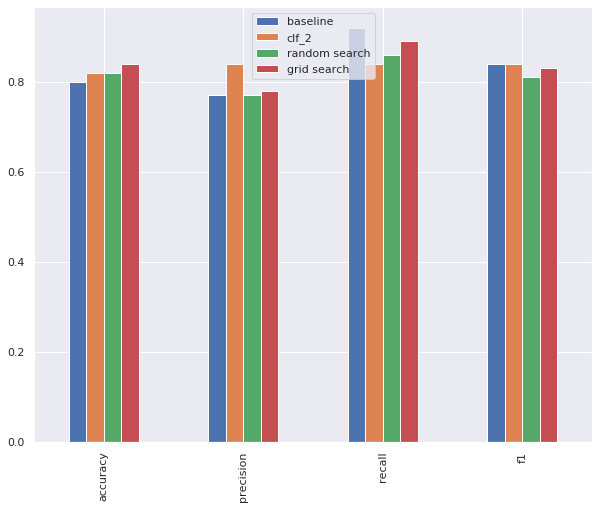

In [154]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10,8))

## Saving and Loading trainde machine learning models

Two ways to save and load machine learning models:
    1. With python's `pickle` module
    2. With the `joblib` module
    
**Pickle**

In [157]:
import pickle

# Save and extistiong model to file

pickle.dump(gs_clf, open("gs_random_forest_model_1.pk1", "wb"))

/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ResourceWarning: unclosed file <_io.BufferedWriter name='gs_random_forest_model_1.pk1'>
  """


In [159]:
# Load and save model
loaded_pickle_model = pickle.load(open("gs_random_random_forest_model_1.pk1", "rb"))

/home/a2r7i4f3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ResourceWarning: unclosed file <_io.BufferedReader name='gs_random_random_forest_model_1.pk1'>
  


In [160]:
pickle_y_preds = loaded_pickle_model.predict(x_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 83.61%
Precision: 0.78
Recall: 0.89
F1 score: 0.83


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'f1': 0.83}

**Joblib**

In [161]:
from joblib import dump, load

# Save model to file

dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [162]:
# Import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [163]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 83.61%
Precision: 0.78
Recall: 0.89
F1 score: 0.83


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'f1': 0.83}